## Analysis of Variance (ANOVA)

In this notebook, we explore the Analysis of Variance (ANOVA) technique. Analysis of Variance (ANOVA) is a statistical procedure for comparing means of two or more populations. Essentially, we wish to understand whether two populations are significantly different from each other by comparing their means. 

Previously, we prepared a series of distribution plots for a single numerical feature where each distribution plot corresponds to the values for the numerical feature for a given attribute of a categorical feature. Here, we use ANOVA to evaluate statistically and what we see in those plots.

In [1]:
source('src/load_data-02.r')
source('src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
attach(housing_df)

### One-way ANOVA

One-way ANOVA is perhaps the simplest ANOVA technique and handles a special case of this problem, testing for equal group means using a single feature. The idea is essentially this

1. Identify a numerical feature for analysis (often the target feature)
2. Split that numerical features into groups using a categorical feature
3. Run a one-way ANOVA on these groups
    4. If it is found that than means are equal for all groups, then this categorical feature may be less relevant for predicting the numerical feature in question
    5. If it is found that the means are not equal for all groups, then this categorical feature may be important for predicting the numerical feature in question

In a one-way ANOVA, the null hypothesis is that the mean responses are equal for all groups. The alternative hypothesis is that the mean responses are not equal for all groups. It is helpful to recall that any statistical test, it is standard that if the $p$-value of the test is less than 0.05, then the null hypothesis can be rejected.

**A $p$-value greater than 0.05 does not necessarily mean that the null hypothesis should be accepted.**

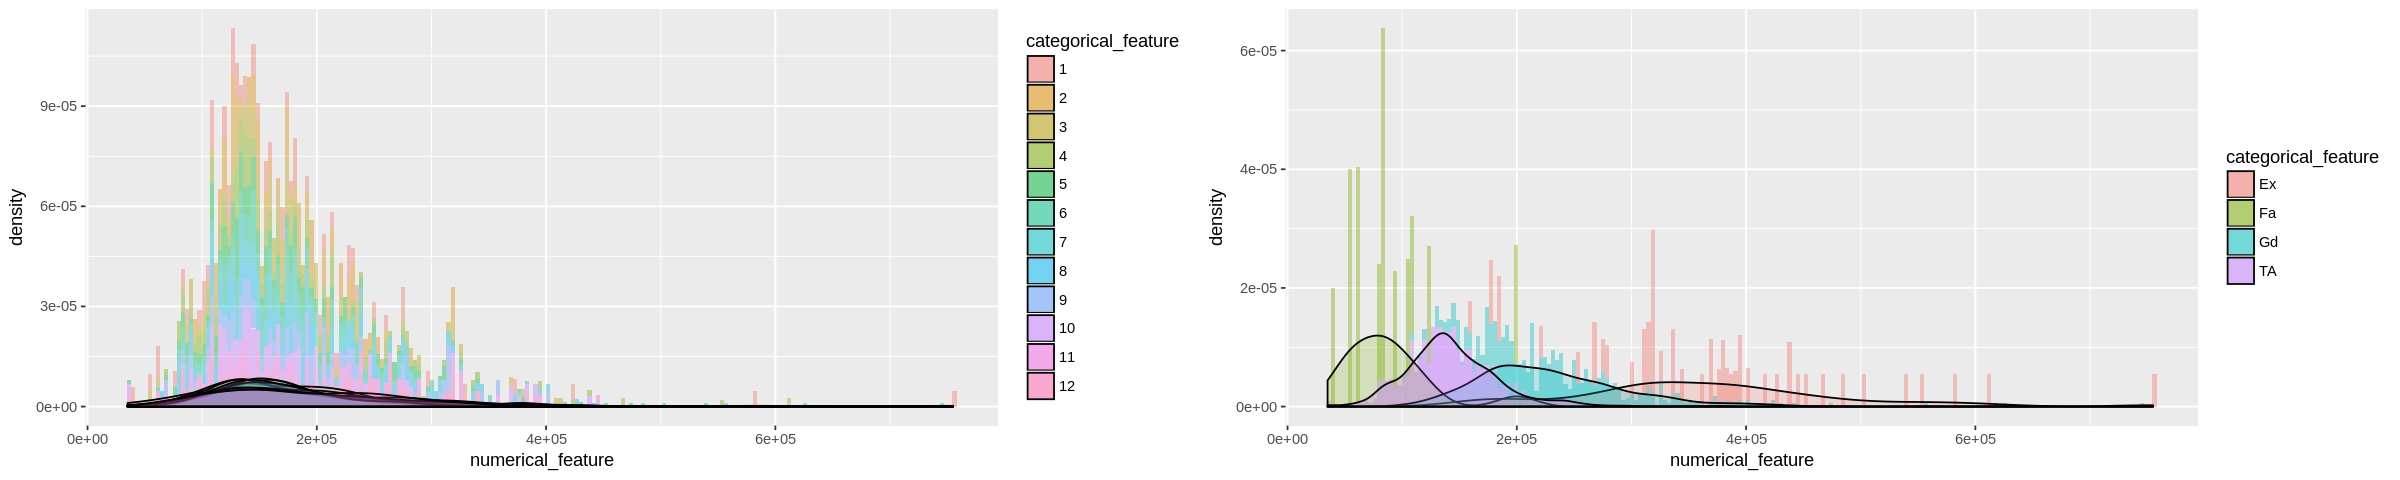

In [6]:
multiplot(hist_with_kde_numerical_by_category(SalePrice,MoSold),
          hist_with_kde_numerical_by_category(SalePrice,ExterQual), 
          cols = 2)

#### Month Sold

Consider the null hypothesis:

$$H_0: \text{the mean responses are equal for all groups}$$

In [7]:
meansd = function(x) c(mean=mean(x), sd=sd(x))
by(SalePrice, MoSold, FUN=meansd)

MoSold: 1
    mean       sd 
183256.3 121381.1 
------------------------------------------------------------ 
MoSold: 2
     mean        sd 
177882.00  52960.86 
------------------------------------------------------------ 
MoSold: 3
     mean        sd 
182570.12  87143.86 
------------------------------------------------------------ 
MoSold: 4
     mean        sd 
171503.26  77147.32 
------------------------------------------------------------ 
MoSold: 5
     mean        sd 
171943.95  69013.79 
------------------------------------------------------------ 
MoSold: 6
     mean        sd 
177395.74  69453.09 
------------------------------------------------------------ 
MoSold: 7
     mean        sd 
186331.19  91772.13 
------------------------------------------------------------ 
MoSold: 8
     mean        sd 
184649.78  73520.42 
------------------------------------------------------------ 
MoSold: 9
     mean        sd 
191339.39  76281.58 
----------------------------------------

In [8]:
oneway.test(SalePrice ~ MoSold)


	One-way analysis of means (not assuming equal variances)

data:  SalePrice and MoSold
F = 0.90408, num df = 11.00, denom df = 405.31, p-value = 0.5364


##### This test shows that we CAN NOT reject the null hypothesis

#### Exterior Quality

Consider the null hypothesis:

$$H_0: \text{the mean responses are equal for all groups}$$

In [9]:
by(SalePrice, ExterQual, FUN=meansd)

ExterQual: Ex
    mean       sd 
365446.5 116729.7 
------------------------------------------------------------ 
ExterQual: Fa
    mean       sd 
87985.21 39826.92 
------------------------------------------------------------ 
ExterQual: Gd
     mean        sd 
232038.00  71595.41 
------------------------------------------------------------ 
ExterQual: TA
     mean        sd 
144315.72  42488.31 

In [10]:
oneway.test(SalePrice ~ ExterQual)


	One-way analysis of means (not assuming equal variances)

data:  SalePrice and ExterQual
F = 264.07, num df = 3.000, denom df = 52.093, p-value < 2.2e-16


##### This test shows that we CAN reject the null hypothesis